Голдобин Денис ФИТ-2-21
это начало вашей первой контрольной точки по Классификации.
Датасет - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
  
1 часть
 1. Скачать один из наборов данных
 1. Загрузить данные в датафрейм
 1. Вывести статистическую информацию о наборе данных
 1. Вывести названия столбцов и строк
 1. Заменить категориальные данные количественными
 1. Визуализировать данные с помощью Matplotlib и Seaborn
   1. Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!
   1. Должно быть не менее 3х групповых визуализаций




Подключение библиотек и Google диска

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков
from google.colab import drive
from sklearn.preprocessing import LabelEncoder


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Считывание данных

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datapy/data.csv', delimiter=';')

Вывод шапки датасета и названий всех колонок

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Описание данных:

Marital status – Семейное положение

Application mode – Способ подачи заявки

Application order – Порядок подачи заявки

Course – Курс

Daytime/evening attendance – Дневная/вечерняя посещаемость

Previous qualification – Предыдущее образование

Previous qualification (grade) – Оценка за предыдущее образование

Nacionality – Национальность


Mother's qualification – Образование матери

Father's qualification – Образование отца

Mother's occupation – Род занятий матери

Father's occupation – Род занятий отца

Admission grade – Вступительная оценка

Displaced – Перемещённый (статус перемещения)

Educational special needs – Специальные образовательные потребности

Debtor – Должник

Tuition fees up to date – Оплата обучения в срок

Gender – Пол

Scholarship holder – Стипендиат

Age at enrollment – Возраст при поступлении

International – Иностранный студент

Curricular units 1st sem (credited) – Зачтённые учебные единицы за 1-й семестр

Curricular units 1st sem (enrolled) – Учебные единицы за 1-й семестр (зачисленные)

Curricular units 1st sem (evaluations) – Оценки по учебным единицам за 1-й семестр

Curricular units 1st sem (approved) – Одобренные учебные единицы за 1-й семестр

Curricular units 1st sem (grade) – Оценка по учебным единицам за 1-й семестр

Curricular units 1st sem (without evaluations) – Учебные единицы за 1-й семестр (без оценок)
Curricular units 2nd sem (credited) – Зачтённые учебные единицы за 2-й семестр

Curricular units 2nd sem (enrolled) – Учебные единицы за 2-й семестр (зачисленные)

Curricular units 2nd sem (evaluations) – Оценки по учебным единицам за 2-й семестр

Curricular units 2nd sem (approved) – Одобренные учебные единицы за 2-й семестр

Curricular units 2nd sem (grade) – Оценка по учебным единицам за 2-й семестр

Curricular units 2nd sem (without evaluations) – Учебные единицы за 2-й семестр (без оценок)

Unemployment rate – Уровень безработицы

Inflation rate – Уровень инфляции

GDP – ВВП (валовой внутренний продукт)

Target -  отчисленные, зачисленные и выпускники - Категориальный

**все данные кроме Target - числовые**

.

.

.

Вывод статистики числовых признаков

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.describe(include=['O'])

,Target
count,4424
unique,3
top,Graduate
freq,2209


Количество не пустых записей 4424, 3 из них уникальные. Наиболее часто встречающаяся запись - Graduate (встречается с частотой 2209)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
df.duplicated().sum()


0

Пустых значений и повторов нет.

In [ ]:
print("Названия столбцов:\n")
for column_name in df.columns:
    print(column_name)

print("\nСтроки:")
print(df.index)

Названия столбцов:

Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target

Строки:
RangeIndex(start=0, stop=4424, step=1)


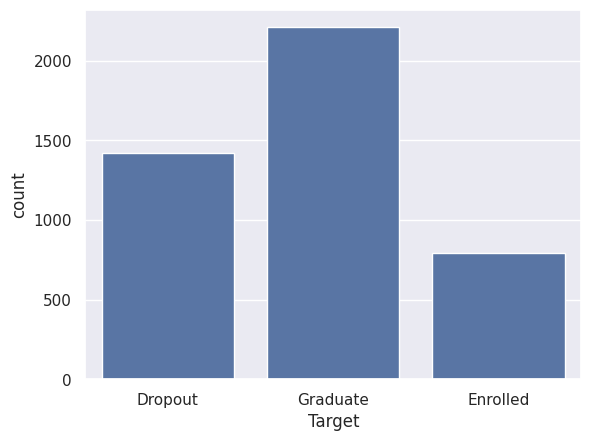

In [ ]:
sns.countplot(x=df["Target"]);

На диаграмме можем увидеть количество зачисленных студентов (Enroled), количество отчислевшихся (Dropout) и количество закончивших обучение (Graduate Target)

**Замена категориального типа (Target) на числовой**

In [ ]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

Проверка замены

In [ ]:
df['Target']

,Target
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


# **Визуализация данных**

In [ ]:
plt.style.use('seaborn-darkgrid')
sns.set(style="whitegrid")

<ipython-input-17-43c751426493>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


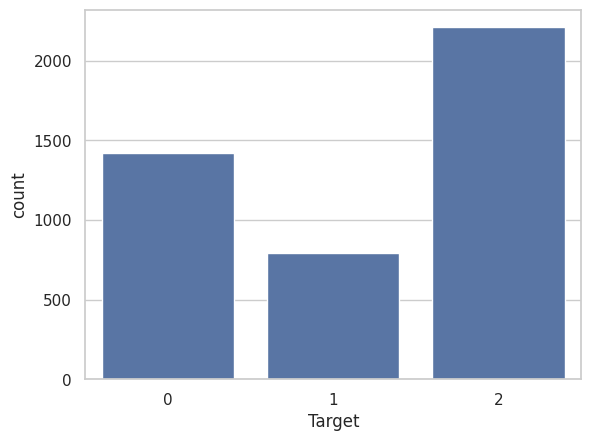

In [ ]:
sns.countplot(x=df["Target"]);

После замены типа данных Target на числовой, теперь 0 - Отчисленные студенты; 1 - Зачисленные студенты ; 2 - Окончившие обучение

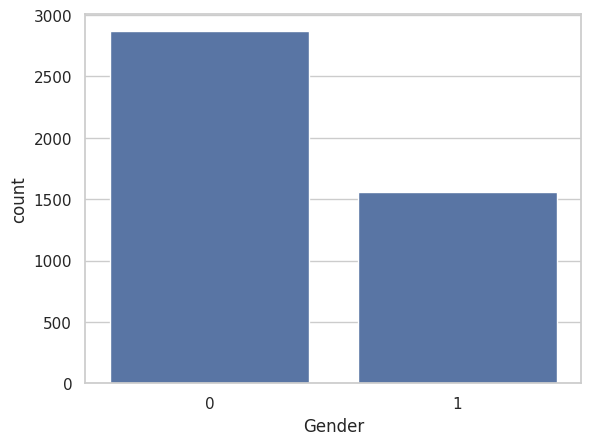

In [ ]:
sns.countplot(x=df["Gender"]);

1 – Мужчины 0 – Женщины

**Визуализация возраста студентов при зачислении**

<ipython-input-21-7159cfe5e6a8>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age at enrollment'], shade=True)


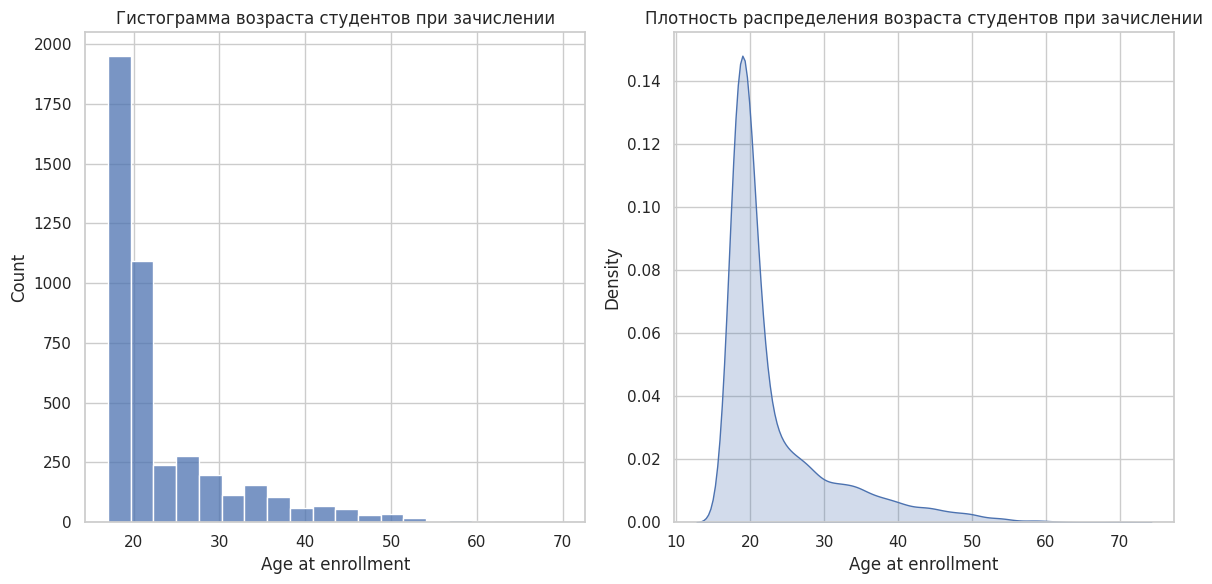

In [ ]:
# Визуализация для столбца
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['Age at enrollment'], kde=False, bins=20)
plt.title('Гистограмма возраста студентов при зачислении')

# Плотность распределения
plt.subplot(1, 2, 2)
sns.kdeplot(df['Age at enrollment'], shade=True)
plt.title('Плотность распределения возраста студентов при зачислении')

plt.tight_layout()
plt.show()

**Визуализация количества баллов при зачислении**

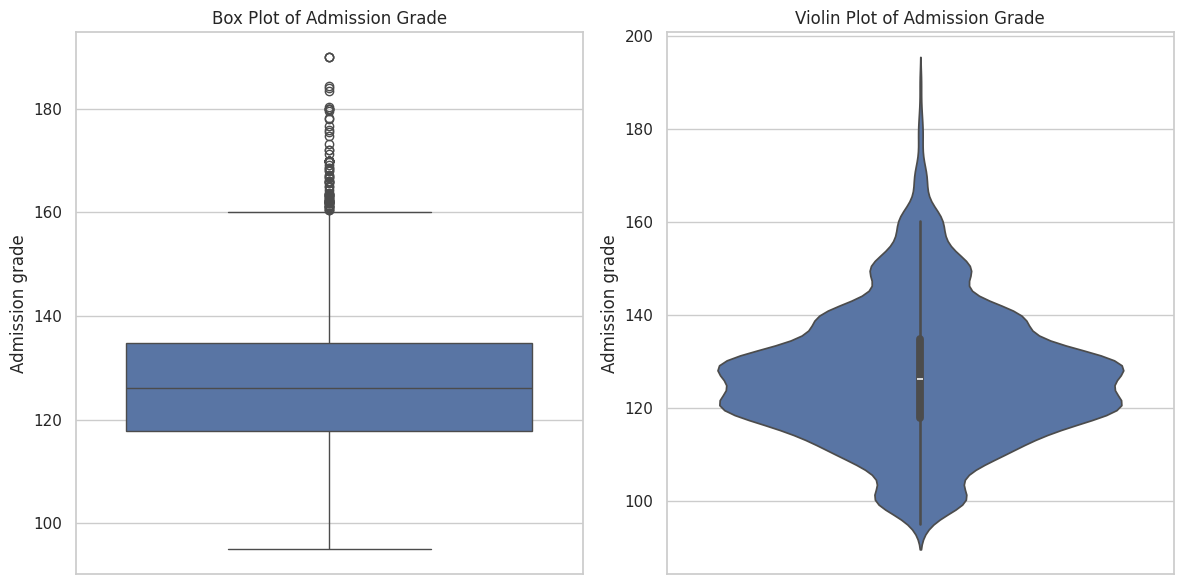

In [ ]:
plt.figure(figsize=(12, 6))

# Коробчатая диаграмма
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Admission grade')
plt.title('Box Plot of Admission Grade')

# Виолончельная диаграмма
plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='Admission grade')
plt.title('Violin Plot of Admission Grade')

plt.tight_layout()
plt.show()

Матрица корреляции

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


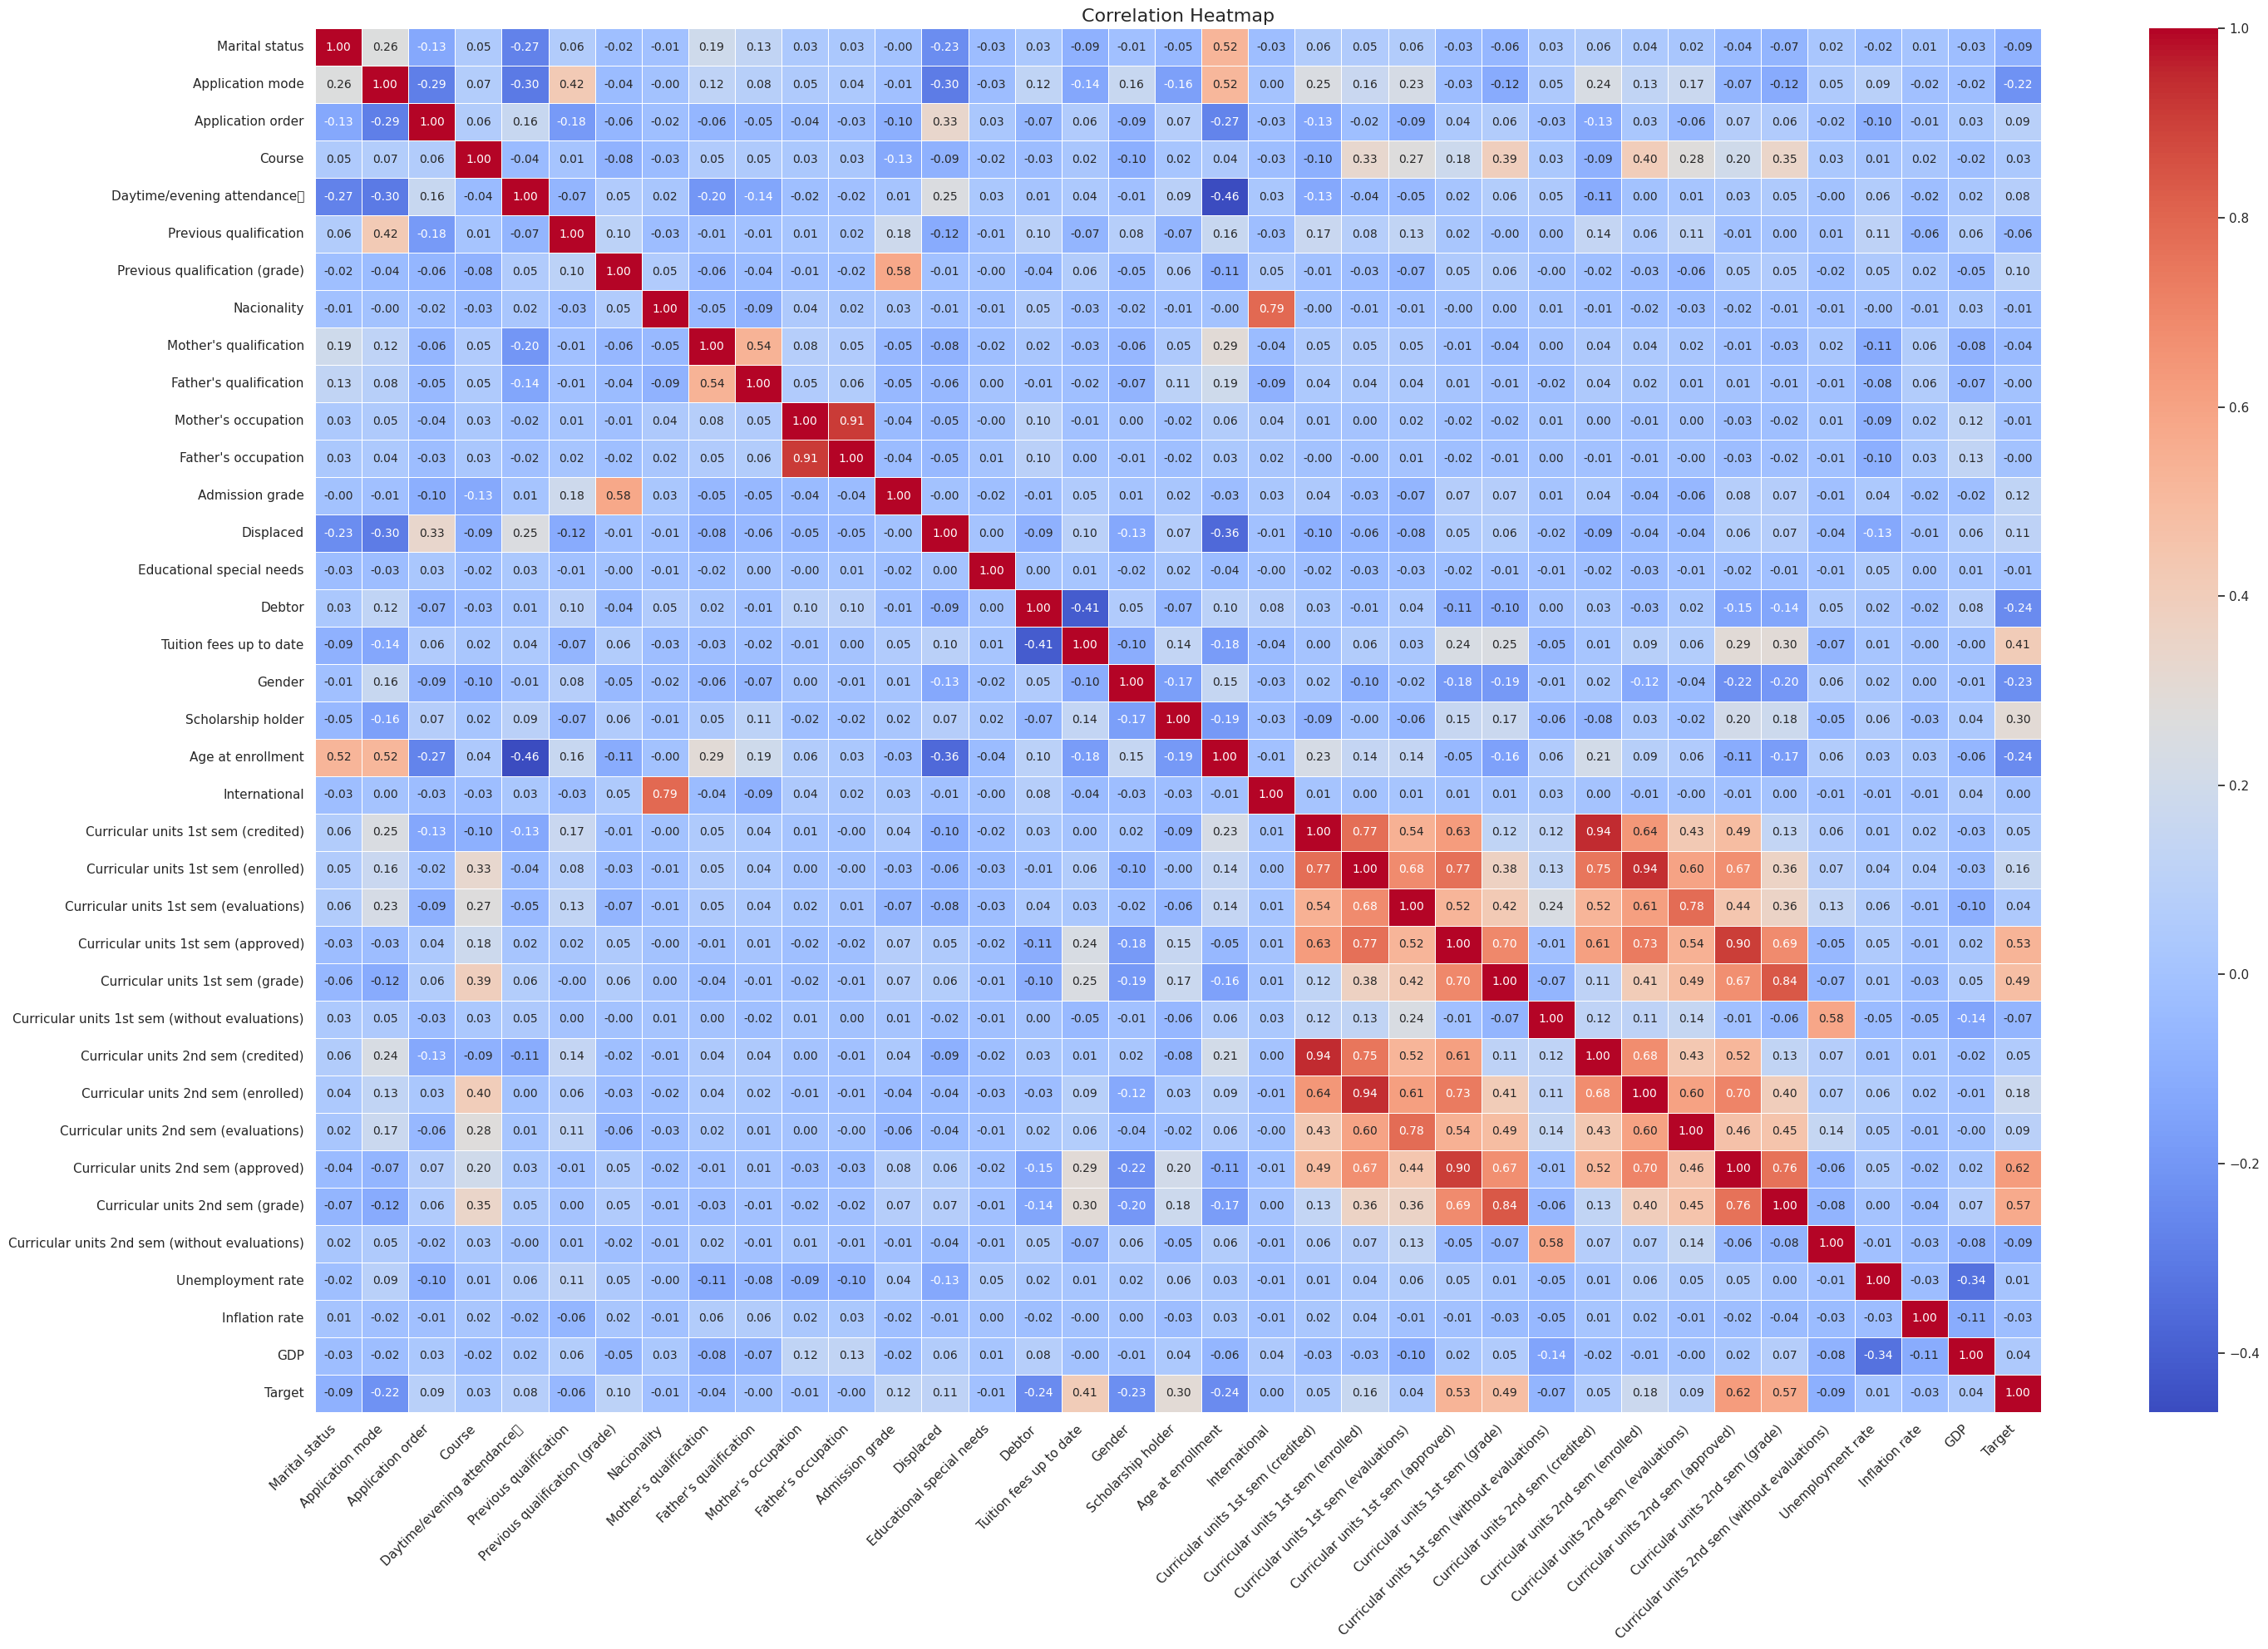

In [ ]:
# Построение матрицы корреляции
plt.figure(figsize=(30, 20))  # Увеличение размеров фигуры
corr_matrix = df.corr()

# Тепловая карта корреляции с улучшениями
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Heatmap', size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Уменьшение лишних отступов
plt.show()


Распределение баллов за поступление (Admission grade) в зависимости от пола студентов (Gender).
1 – Мужчины 0 – Женщины

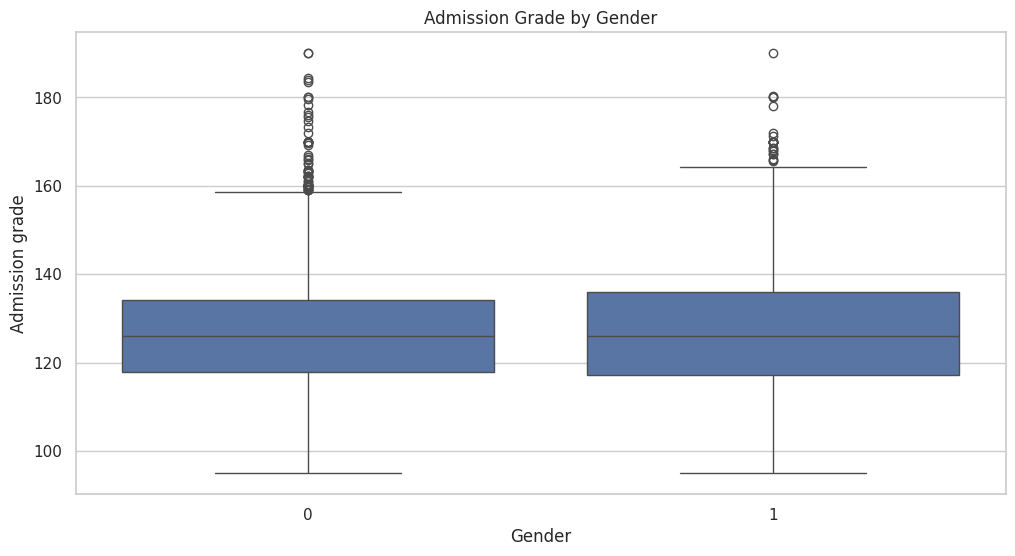

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Gender', y='Admission grade', data=df)
plt.title('Admission Grade by Gender')
plt.show()



Посмотрим количество студентов по возрасту при их поступлении.

Age at enrollment
17       5
18    1036
19     911
20     599
21     322
22     174
23     108
24     131
25      93
26      94
27      91
28      83
29      66
30      49
31      55
32      61
33      45
34      60
35      49
36      35
37      42
38      29
39      38
40      23
41      31
42      13
43      25
44      21
45      22
46      12
47      18
48      11
49      13
50      16
51       7
52       4
53       7
54       7
55       5
57       2
58       3
59       3
60       2
61       1
62       1
70       1
Name: count, dtype: int64


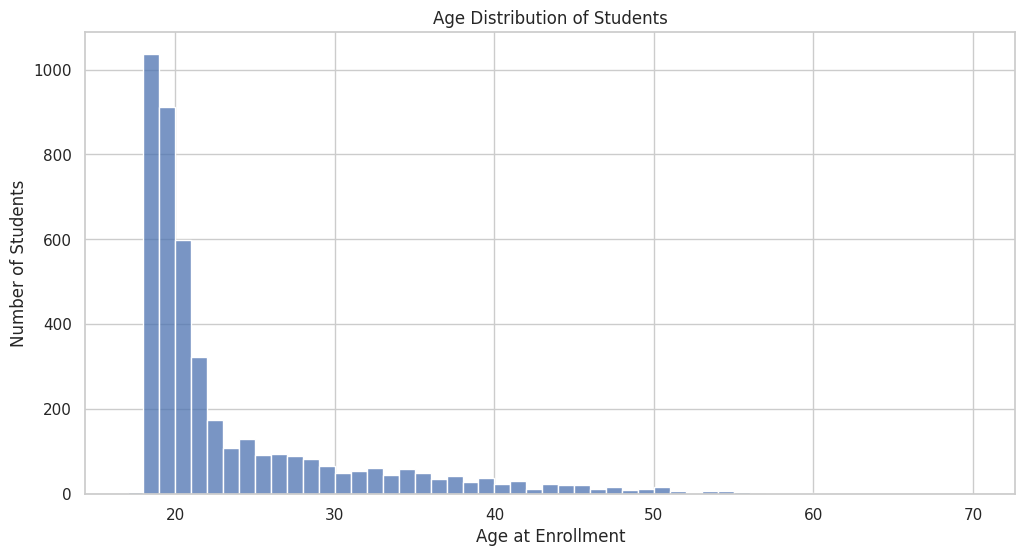

In [ ]:
age_distribution = df['Age at enrollment'].value_counts().sort_index()

# Печатаем распределение студентов по возрасту
print(age_distribution)

# Дополнительно, можно визуализировать распределение студентов по возрасту
plt.figure(figsize=(12, 6))
sns.histplot(df['Age at enrollment'], bins=range(int(df['Age at enrollment'].min()), int(df['Age at enrollment'].max()) + 1), kde=False)
plt.title('Age Distribution of Students')
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.show()

Распределение характеристик студентов, которых отчисляют (Target = 0)

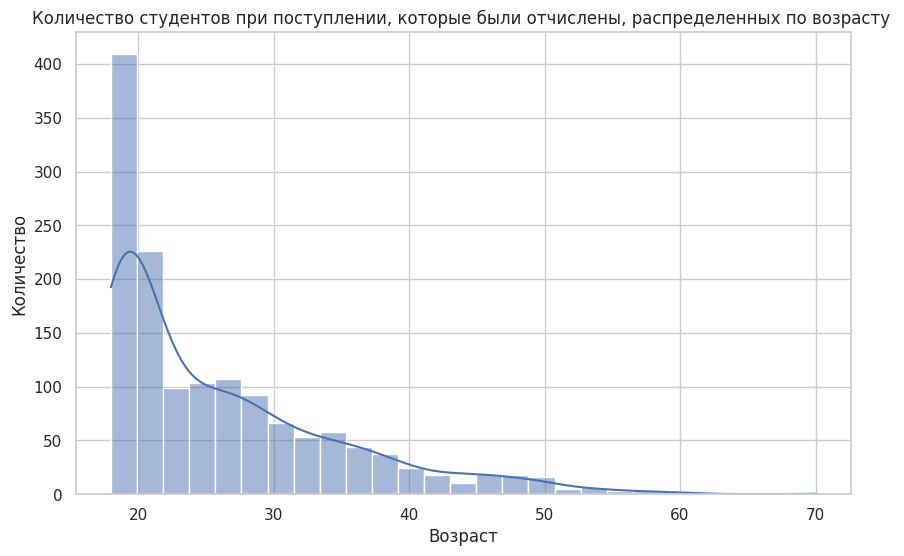

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['Age at enrollment'], kde=True)
plt.title('Количество студентов при поступлении, которые были отчислены, распределенных по возрасту ')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<ipython-input-39-360d4ea1d5ff>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dismissal_stats = df[df['Target'] == 0].groupby('Age group').size() / df.groupby('Age group').size() * 100
<ipython-input-39-360d4ea1d5ff>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dismissal_stats = df[df['Target'] == 0].groupby('Age group').size() / df.groupby('Age group').size() * 100


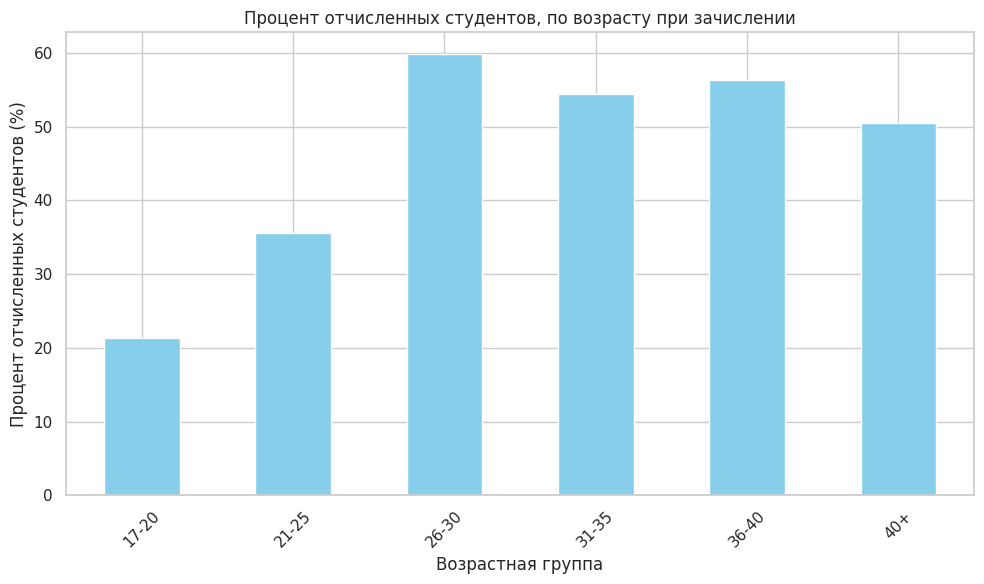

In [ ]:
# Создаем возрастные группы (биннинг)
df['Age group'] = pd.cut(df['Age at enrollment'], bins=[17, 20, 25, 30, 35, 40, 50],
                         labels=['17-20', '21-25', '26-30', '31-35', '36-40', '40+'])

# Рассчитываем процент отчисленных студентов в каждой возрастной группе
age_dismissal_stats = df[df['Target'] == 0].groupby('Age group').size() / df.groupby('Age group').size() * 100

# Визуализация процента отчисленных студентов по возрасту
plt.figure(figsize=(10, 6))
age_dismissal_stats.plot(kind='bar', color='skyblue')
plt.title('Процент отчисленных студентов, по возрасту при зачислении')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент отчисленных студентов (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Чаще всего отчисляют студентов, которые поступали в возрасте 26-30 лет

Анализ баллов студентов при поступлении, по категориям отчисленые, зачисленные и окончившие обучение. 0 - Отчисленные студенты; 1 - Зачисленные студенты ; 2 - Окончившие обучение

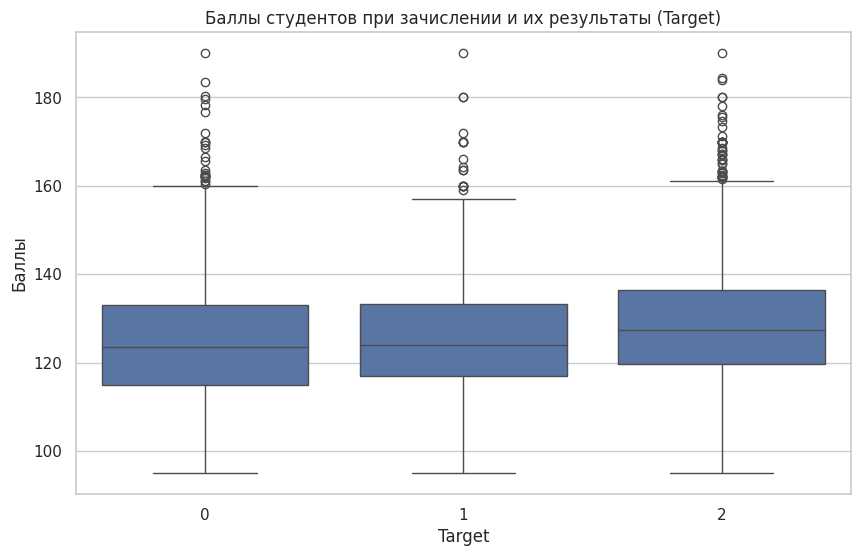

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Баллы студентов при зачислении и их результаты (Target)')
plt.xlabel('Target')
plt.ylabel('Баллы')
plt.show()

Cтуденты окончившие своё обучение имеют большую медиану по количеству баллов, при поступлении.

Распределение отчисленных студентов по полу  (Gender)

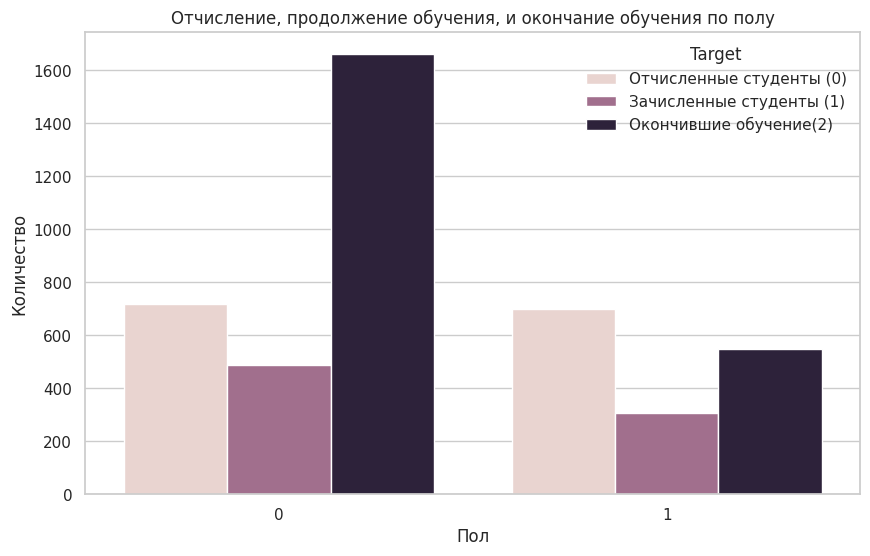

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Target', data=df)
plt.title('Отчисление, продолжение обучения, и окончание обучения по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Target', loc='upper right', labels=['Отчисленные студенты (0)', 'Зачисленные студенты (1)',  'Окончившие обучение(2)'])
plt.show()
